**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de aprendizaje automático**

Tecnológico de Monterrey

Dr. Gerardo Rodríguez Hernández

**Semana 5**
Fase 1 | Avance de Proyecto
---

### Carga de datos

In [185]:
# Librerías
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [186]:
# Carga de datos del repositorio de la UCI Regensburg Pediatric Appendicitis
!pip install ucimlrepo

In [187]:
# Carga de datos de nuestro data set
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)
df_X = regensburg_pediatric_appendicitis.data.features
df_y = regensburg_pediatric_appendicitis.data.targets

In [188]:
# Mostrar las primeras filas del dataset
df_X.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


### Exploración inicial de los datos

In [189]:
# Información general del dataset
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [190]:
# Estadísticas descriptivas para variables numéricas
df_X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,781.0,11.346451,3.529909,0.00,9.2000,11.44,14.10,18.36
BMI,755.0,18.907012,4.385331,7.83,15.7250,18.06,21.18,38.16
Height,756.0,148.017460,19.732016,53.00,137.0000,149.65,163.00,192.00
Weight,779.0,43.172542,17.390984,3.96,29.5000,41.40,54.00,103.00
Length_of_Stay,778.0,4.284062,2.574057,1.00,3.0000,3.00,5.00,28.00
Alvarado_Score,730.0,5.921918,2.155972,0.00,4.0000,6.00,8.00,10.00
Paedriatic_Appendicitis_Score,730.0,5.253425,1.958456,0.00,4.0000,5.00,7.00,10.00
Appendix_Diameter,498.0,7.762651,2.536671,2.70,6.0000,7.50,9.10,17.00
Body_Temperature,775.0,37.404516,0.903678,26.90,36.8000,37.20,37.90,40.20
WBC_Count,776.0,12.670683,5.366525,2.60,8.2000,12.00,16.20,37.70


In [191]:
df_y.head()

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis


In [192]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Management  781 non-null    object
 1   Severity    781 non-null    object
 2   Diagnosis   780 non-null    object
dtypes: object(3)
memory usage: 18.5+ KB


In [193]:
# Estadísticas descriptivas para variables numéricas
df_y.describe().T

,count,unique,top,freq
Management,781,4,conservative,483
Severity,781,2,uncomplicated,662
Diagnosis,780,2,appendicitis,463


In [194]:
df_X.shape

(782, 53)

### Análisis EDA

In [195]:
df_numeric = df_X.select_dtypes(include=['float64', 'int64'])

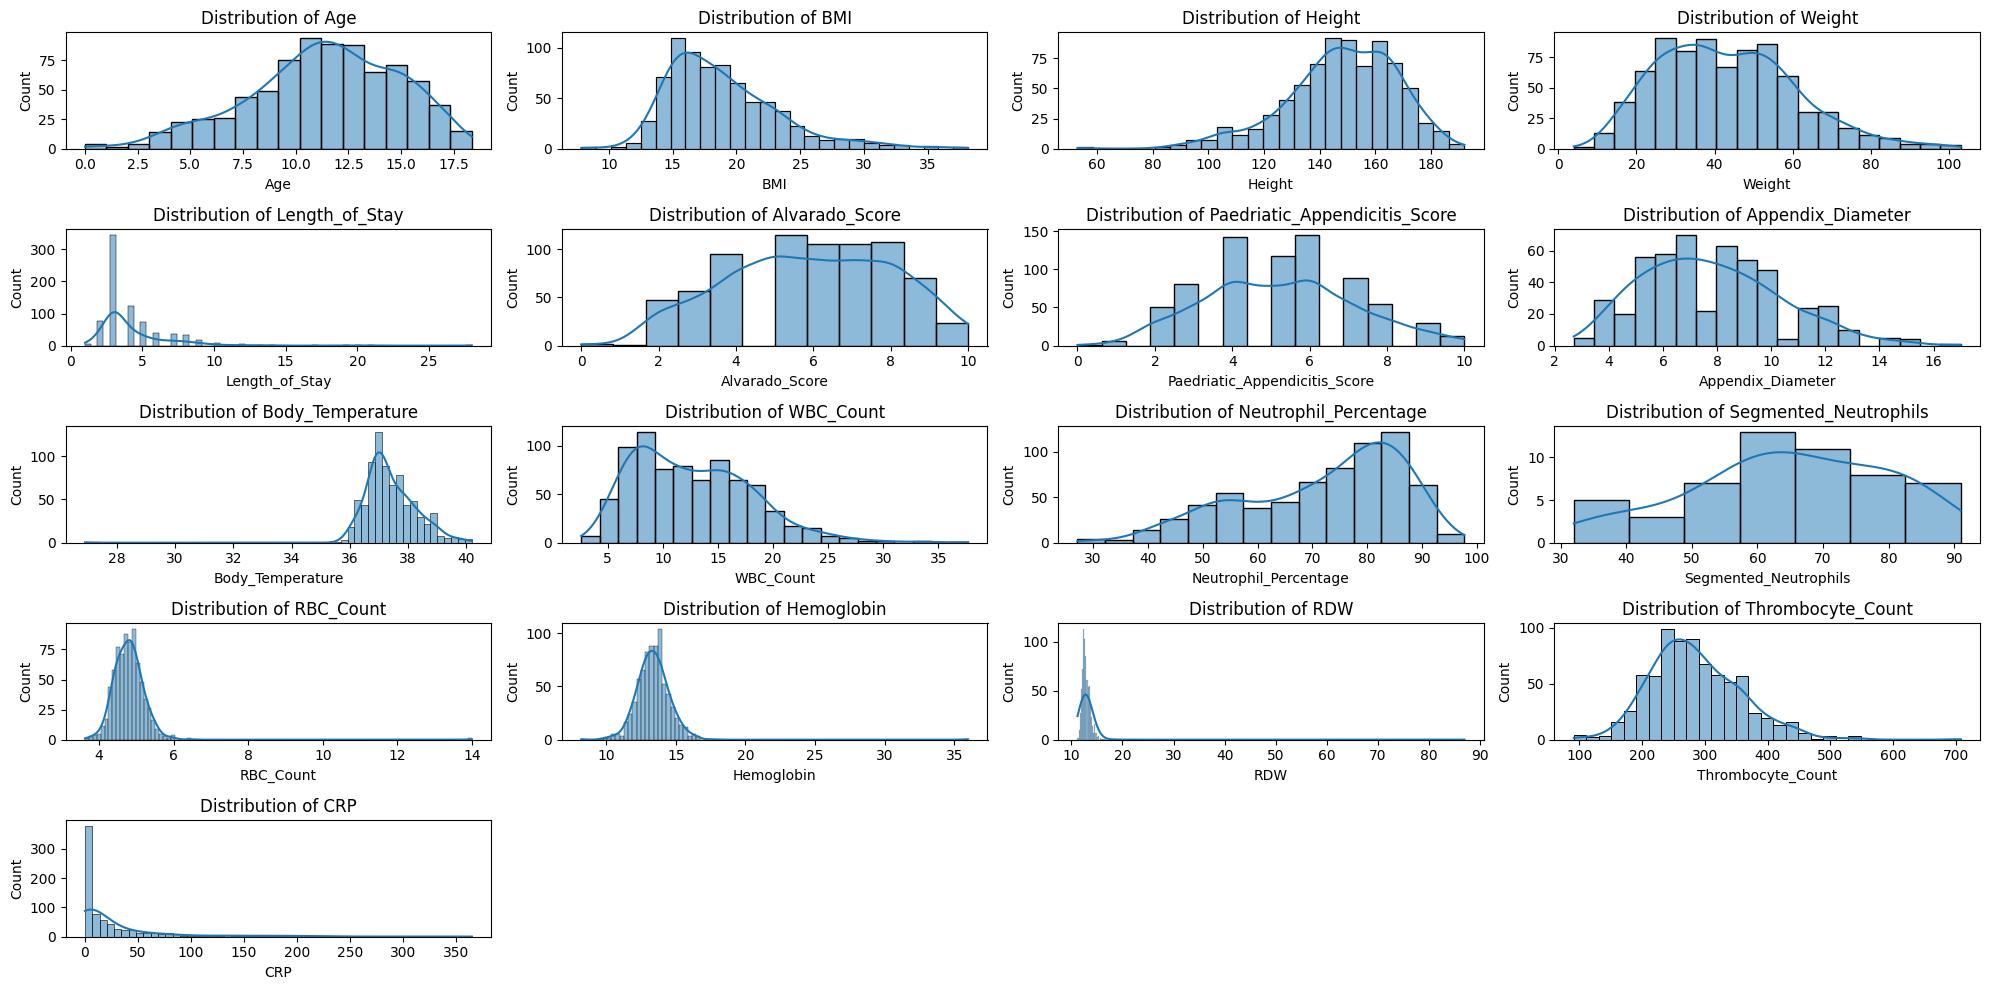

In [196]:
# Se define el número de columnas para los subplots
n_cols = 4
n_rows = (len(df_numeric.columns) + n_cols - 1) // n_cols

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))
axes = axes.flatten()

# Graficar un histograma para cada variable
for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()

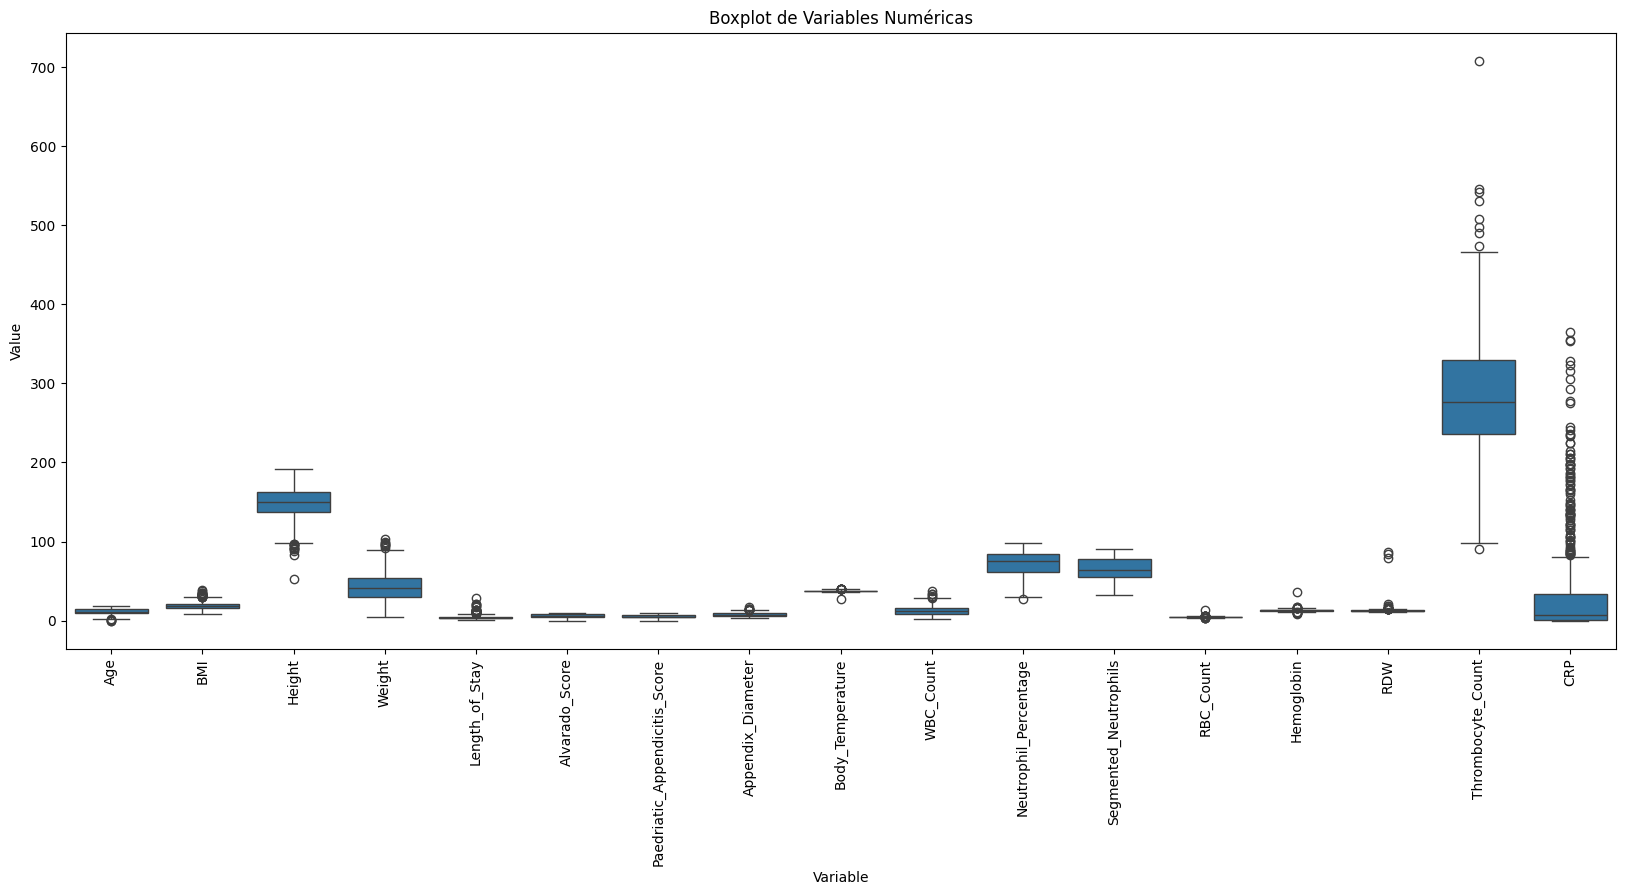

In [197]:
data_melted = df_numeric.melt(var_name='Variable', value_name='Value')

# Crear un boxplot con Seaborn
plt.figure(figsize=(20, 8))
sns.boxplot(x='Variable', y='Value', data=data_melted)
plt.xticks(rotation=90)
plt.title('Boxplot de Variables Numéricas')
plt.show()

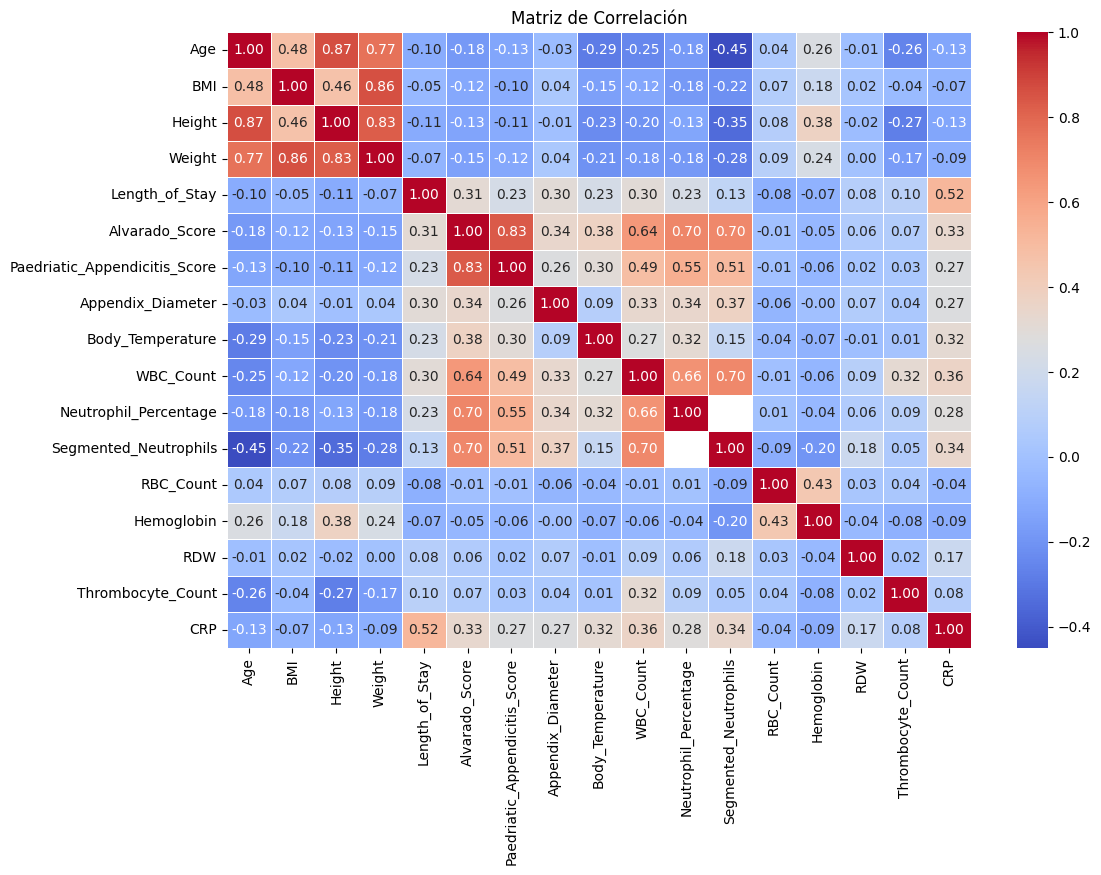

In [198]:
# Matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Limpieza de datos

In [199]:
# Se verifican valores nulos
df_X.isnull().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


como primer paso se procede a imputar los datos para obtener un mejor resultado, en este caso de realizará de la siguiente manera:
* Mediana, para quellos valores de tipo numerico
* Moda, para quellos valores de tipo categórico

In [200]:
# Imputar valores numéricos con la mediana
df_X[df_numeric.columns] = df_X[df_numeric.columns].fillna(df_X[df_numeric.columns].median())

C:\Users\SALVA\AppData\Local\Temp\ipykernel_33468\3270969161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[df_numeric.columns] = df_X[df_numeric.columns].fillna(df_X[df_numeric.columns].median())


In [201]:
# Para variables categóricas, usamos la moda
categorical_cols = df_X.select_dtypes(exclude=np.number).columns # Extraemos las varibales categoricas
df_X[categorical_cols] = df_X[categorical_cols].fillna(df_X[categorical_cols].mode().iloc[0])

C:\Users\SALVA\AppData\Local\Temp\ipykernel_33468\788768716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X[categorical_cols] = df_X[categorical_cols].fillna(df_X[categorical_cols].mode().iloc[0])


In [202]:
# Se verifica nuevamente los valores nulos
df_X.isnull().sum()

Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_Urine                    0
RBC_in_Urine

In [203]:
df_X.shape

(782, 53)

In [204]:
df_encoded = pd.get_dummies(df_X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [205]:
print(X_scaled)
X_scaled.shape

[[ 3.78235514e-01 -4.58997900e-01 -3.69968783e-03 ...  1.49071198e-01
  -3.57828133e-02 -3.57828133e-02]
 [ 7.81027347e-01  3.02218360e+00 -5.52710939e-02 ...  1.49071198e-01
  -3.57828133e-02 -3.57828133e-02]
 [ 7.92373596e-01  1.02630621e+00  7.69871403e-01 ...  1.49071198e-01
  -3.57828133e-02 -3.57828133e-02]
 ...
 [ 1.03348138e+00  2.39559187e-01  2.02585936e-01 ... -6.70820393e+00
  -3.57828133e-02  2.79463772e+01]
 [-1.17620057e+00 -1.06240269e+00 -9.68084981e-01 ...  1.49071198e-01
  -3.57828133e-02 -3.57828133e-02]
 [ 4.63577370e-02 -1.64257867e-01 -8.10567969e-02 ...  1.49071198e-01
  -3.57828133e-02 -3.57828133e-02]]


(782, 111)

### Modelo de datos

In [206]:
# Dividir en entrenamiento (80%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_y, test_size=0.3, random_state=42)

#### Entrenamiento de modelos

In [207]:
# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_X.select_dtypes(include=[np.number]))
X_scaled_df = pd.DataFrame(X_scaled, columns=df_X.select_dtypes(include=[np.number]).columns)

In [208]:
# Usar One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(df_X, drop_first=True)
X_encoded.head()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,...,Gynecological_Findings_Ovarialzyste,Gynecological_Findings_Ovarialzyste re.,Gynecological_Findings_Ovarialzysten,Gynecological_Findings_V. a. Ovarialtorsion,Gynecological_Findings_Zyste Uterus,Gynecological_Findings_ja,Gynecological_Findings_kein Anhalt für eine gynäkologische Ursache der Beschwerden,Gynecological_Findings_keine,Gynecological_Findings_kleine Ovarzyste rechts,Gynecological_Findings_unauffällig
0,12.68,16.9,148.0,37.0,3.0,4.0,3.0,7.1,37.0,7.7,...,False,False,False,False,False,False,False,True,False,False
1,14.10,31.9,147.0,69.5,2.0,5.0,4.0,7.5,36.9,8.1,...,False,False,False,False,False,False,False,True,False,False
2,14.14,23.3,163.0,62.0,4.0,5.0,3.0,7.5,36.6,13.2,...,False,False,False,False,False,False,False,True,False,False
3,16.37,20.6,165.0,56.0,3.0,7.0,6.0,7.5,36.0,11.4,...,False,False,False,False,False,False,False,True,False,False
4,11.08,16.9,163.0,45.0,3.0,5.0,6.0,7.0,36.9,8.1,...,False,False,False,False,False,False,False,True,False,False


In [209]:
# Reducción de dimensionalidad
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

Regresión logistica

In [210]:
# Preparación de los datos
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

y_train_clean = y_train.dropna(subset=['Severity'])
y_test_clean = y_test.dropna(subset=['Severity'])

X_train_df.reset_index(drop=True, inplace=True)
X_test_df.reset_index(drop=True, inplace=True)
y_train_clean.reset_index(drop=True, inplace=True)
y_test_clean.reset_index(drop=True, inplace=True)

X_train_clean = X_train_df.loc[y_train_clean.index]
X_test_clean = X_test_df.loc[y_test_clean.index]


               precision    recall  f1-score   support

  complicated       0.58      0.50      0.54        36
uncomplicated       0.91      0.93      0.92       198

     accuracy                           0.87       234
    macro avg       0.75      0.72      0.73       234
 weighted avg       0.86      0.87      0.86       234



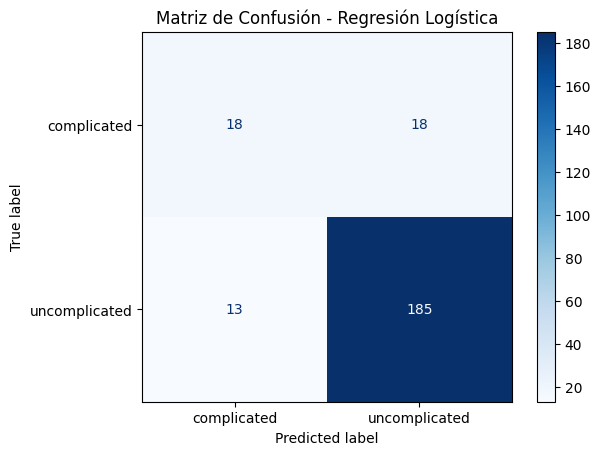

In [211]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_clean, y_train_clean['Severity'])

y_pred_log = log_reg.predict(X_test_clean)

conf_matrix = confusion_matrix(y_test_clean['Severity'], y_pred_log)
print(classification_report(y_test_clean['Severity'], y_pred_log))

# Mostrar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y_test_clean['Severity'].unique())
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

Random Forest

               precision    recall  f1-score   support

  complicated       0.72      0.58      0.65        36
uncomplicated       0.93      0.96      0.94       198

     accuracy                           0.90       234
    macro avg       0.83      0.77      0.79       234
 weighted avg       0.90      0.90      0.90       234



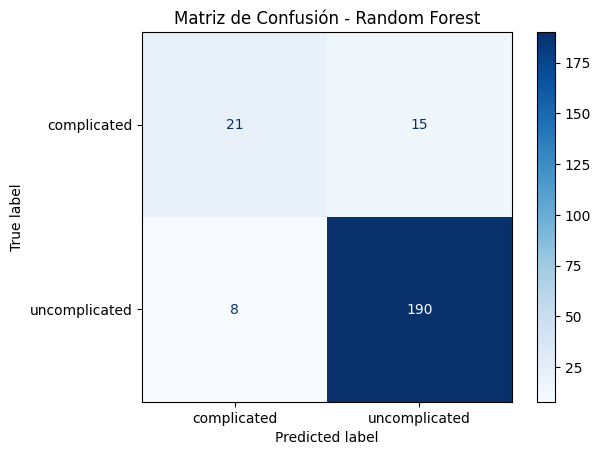

In [212]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_clean, y_train_clean['Severity'])

y_pred_log = rf.predict(X_test_clean)

conf_matrix = confusion_matrix(y_test_clean['Severity'], y_pred_log)
print(classification_report(y_test_clean['Severity'], y_pred_log))

# Mostrar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=y_test_clean['Severity'].unique())
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.show()